In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import re

In [3]:
spoons_df = pd.read_csv("newfood.csv")
recipenlg_df = pd.read_csv("RecipeNLG_dataset.csv")

In [4]:
spoons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1722 non-null   int64  
 1   title                 1722 non-null   object 
 2   pricePerServing       1722 non-null   float64
 3   weightPerServing      1722 non-null   int64  
 4   vegetarian            1722 non-null   bool   
 5   vegan                 1722 non-null   bool   
 6   glutenFree            1722 non-null   bool   
 7   dairyFree             1722 non-null   bool   
 8   sustainable           1722 non-null   bool   
 9   veryHealthy           1722 non-null   bool   
 10  veryPopular           1722 non-null   bool   
 11  gaps                  1722 non-null   object 
 12  lowFodmap             1722 non-null   bool   
 13  ketogenic             1722 non-null   bool   
 14  whole30               1722 non-null   bool   
 15  readyInMinutes       

In [5]:
recipenlg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231142 entries, 0 to 2231141
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   title        object
 2   ingredients  object
 3   directions   object
 4   link         object
 5   source       object
 6   NER          object
dtypes: int64(1), object(6)
memory usage: 119.2+ MB


In [6]:
spoons_df.isnull().sum()

id                         0
title                      0
pricePerServing            0
weightPerServing           0
vegetarian                 0
vegan                      0
glutenFree                 0
dairyFree                  0
sustainable                0
veryHealthy                0
veryPopular                0
gaps                       0
lowFodmap                  0
ketogenic                  0
whole30                    0
readyInMinutes             0
spoonacularSourceUrl       0
image                      5
aggregateLikes             0
spoonacularScore           0
healthScore                0
percentProtein             0
percentFat                 0
percentCarbs               0
dishTypes                 78
ingredients                0
cuisines                1378
calories                   0
Fat/g                      0
Saturated Fat/g            0
Carbohydrates/g            0
Sugar/g                    0
Cholesterol/mg             0
Sodium/mg                  0
Protein/g     

In [7]:
# drop cols: weight per serving, sustainable - health score, dish types, cuisines
spoons_df.head(10)

,id,title,pricePerServing,weightPerServing,vegetarian,vegan,glutenFree,dairyFree,sustainable,veryHealthy,...,Vitamin B5/mg,Vitamin B6/mg,Vitamin E/mg,Fiber/g,Vitamin A/IU,Vitamin D/µg,Vitamin K/µg,Vitamin C/mg,Alcohol/g,Caffeine/g
0,1,Fried Anchovies with Sage,5.6051,226,False,False,False,True,False,False,...,1.38,0.26,1.09,1.16,154.80,0.29,0.00,0.00,0.0,0.0
1,2,Anchovies Appetizer With Breadcrumbs & Scallions,0.8206,33,False,False,False,True,False,False,...,0.20,0.04,0.29,0.38,0.00,0.00,7.18,0.00,0.0,0.0
2,3,"Carrots, Cauliflower And Anchovies",4.3800,364,False,False,False,True,False,True,...,0.78,0.27,17.01,9.99,21572.42,0.00,104.27,32.60,0.0,0.0
3,4,Bap Story: Stir Fried Anchovies (Myulchi Bokkeum),8.1122,711,False,False,True,True,False,True,...,5.24,2.73,5.23,2.10,180.52,6.24,16.02,3.88,0.0,0.0
4,5,"Bread, Butter And Anchovies",0.2557,36,False,False,False,False,False,False,...,0.24,0.03,0.19,1.24,128.27,0.00,2.21,0.00,0.0,0.0
5,6,Fried Anchovies,1.5050,83,False,False,False,True,False,False,...,0.42,0.07,4.44,0.35,88.84,0.23,17.46,0.00,0.0,0.0
6,7,"Tomato & Anchovies With Bread Crumbs, Basil & ...",0.8603,101,False,False,False,True,False,False,...,0.20,0.09,1.53,1.37,498.84,0.00,13.29,8.57,0.0,0.0
7,9,Marinated Fresh Anchovies: Alici Marinate,5.5005,244,False,False,True,True,False,False,...,0.80,0.24,2.47,1.49,1271.31,0.00,130.12,10.29,0.0,0.0
8,10,Marinated Boquerones,4.1332,203,False,False,True,True,False,True,...,0.82,0.39,3.75,1.97,2830.48,0.00,78.82,114.99,0.0,0.0
9,11,Spaghetti With Walnuts And Anchovies,0.9284,144,True,False,False,False,False,False,...,0.65,0.31,0.28,4.96,0.00,0.00,0.00,1.18,0.0,0.0


In [8]:
drop_cols = ['sustainable','veryPopular', 'gaps', 'lowFodmap', 'ketogenic', 'whole30', 'readyInMinutes', 'spoonacularSourceUrl', 'image', 'aggregateLikes', 'spoonacularScore', 'healthScore', 'dishTypes', 'cuisines']
spoons_df = spoons_df.drop(drop_cols, axis=1)

In [9]:
spoons_df["pricePerServing"] = spoons_df["pricePerServing"].round(2)
spoons_df.head(25)

,id,title,pricePerServing,weightPerServing,vegetarian,vegan,glutenFree,dairyFree,veryHealthy,percentProtein,...,Vitamin B5/mg,Vitamin B6/mg,Vitamin E/mg,Fiber/g,Vitamin A/IU,Vitamin D/µg,Vitamin K/µg,Vitamin C/mg,Alcohol/g,Caffeine/g
0,1,Fried Anchovies with Sage,5.61,226,False,False,False,True,False,39.64,...,1.38,0.26,1.09,1.16,154.80,0.29,0.00,0.00,0.00,0.0
1,2,Anchovies Appetizer With Breadcrumbs & Scallions,0.82,33,False,False,False,True,False,36.52,...,0.20,0.04,0.29,0.38,0.00,0.00,7.18,0.00,0.00,0.0
2,3,"Carrots, Cauliflower And Anchovies",4.38,364,False,False,False,True,True,6.74,...,0.78,0.27,17.01,9.99,21572.42,0.00,104.27,32.60,0.00,0.0
3,4,Bap Story: Stir Fried Anchovies (Myulchi Bokkeum),8.11,711,False,False,True,True,True,29.89,...,5.24,2.73,5.23,2.10,180.52,6.24,16.02,3.88,0.00,0.0
4,5,"Bread, Butter And Anchovies",0.26,36,False,False,False,False,False,11.01,...,0.24,0.03,0.19,1.24,128.27,0.00,2.21,0.00,0.00,0.0
5,6,Fried Anchovies,1.50,83,False,False,False,True,False,9.93,...,0.42,0.07,4.44,0.35,88.84,0.23,17.46,0.00,0.00,0.0
6,7,"Tomato & Anchovies With Bread Crumbs, Basil & ...",0.86,101,False,False,False,True,False,12.37,...,0.20,0.09,1.53,1.37,498.84,0.00,13.29,8.57,0.00,0.0
7,9,Marinated Fresh Anchovies: Alici Marinate,5.50,244,False,False,True,True,False,45.61,...,0.80,0.24,2.47,1.49,1271.31,0.00,130.12,10.29,0.00,0.0
8,10,Marinated Boquerones,4.13,203,False,False,True,True,True,27.56,...,0.82,0.39,3.75,1.97,2830.48,0.00,78.82,114.99,0.00,0.0
9,11,Spaghetti With Walnuts And Anchovies,0.93,144,True,False,False,False,False,14.07,...,0.65,0.31,0.28,4.96,0.00,0.00,0.00,1.18,0.00,0.0


In [10]:
recipenlg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231142 entries, 0 to 2231141
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Unnamed: 0   int64 
 1   title        object
 2   ingredients  object
 3   directions   object
 4   link         object
 5   source       object
 6   NER          object
dtypes: int64(1), object(6)
memory usage: 119.2+ MB


In [11]:
recipenlg_df.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [12]:
#drop list: unnamed, ingredients, directions, source
keep_cols = ['title', 'link', 'NER']
drop_cols = []
for item in recipenlg_df.columns:
    if item not in keep_cols:
        drop_cols.append(item)       
recipenlg_df = recipenlg_df.drop(drop_cols, axis = 1)


In [13]:
recipenlg_df.head()

,title,link,NER
0,No-Bake Nut Cookies,www.cookbooks.com/Recipe-Details.aspx?id=44874,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,Jewell Ball'S Chicken,www.cookbooks.com/Recipe-Details.aspx?id=699419,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,Creamy Corn,www.cookbooks.com/Recipe-Details.aspx?id=10570,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,Chicken Funny,www.cookbooks.com/Recipe-Details.aspx?id=897570,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,Reeses Cups(Candy),www.cookbooks.com/Recipe-Details.aspx?id=659239,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [14]:
recipenlg_df.rename(columns = {'NER':'ingredients_list'}, inplace = True)

In [15]:
recipenlg_df.head()

,title,link,ingredients_list
0,No-Bake Nut Cookies,www.cookbooks.com/Recipe-Details.aspx?id=44874,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,Jewell Ball'S Chicken,www.cookbooks.com/Recipe-Details.aspx?id=699419,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,Creamy Corn,www.cookbooks.com/Recipe-Details.aspx?id=10570,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,Chicken Funny,www.cookbooks.com/Recipe-Details.aspx?id=897570,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,Reeses Cups(Candy),www.cookbooks.com/Recipe-Details.aspx?id=659239,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [16]:
recipenlg_df.tail()

,title,link,ingredients_list
2231137,Sunny's Fake Crepes,www.foodnetwork.com/recipes/sunny-anderson/sun...,"[""chocolate hazelnut spread"", ""tortillas"", ""bu..."
2231138,Devil Eggs,cookpad.com/us/recipes/355411-devil-eggs,"[""eggs"", ""paprika"", ""salt"", ""choice"", ""miracle..."
2231139,Extremely Easy and Quick - Namul Daikon Salad,cookpad.com/us/recipes/153324-extremely-easy-a...,"[""radish"", ""Sesame oil"", ""White sesame seeds"",..."
2231140,Pan-Roasted Pork Chops With Apple Fritters,cooking.nytimes.com/recipes/1015164,"[""apple cider"", ""sugar"", ""kosher salt"", ""bay l..."
2231141,Polpette in Spicy Tomato Sauce,www.foodandwine.com/recipes/polpette-spicy-tom...,"[""ground veal"", ""sausage"", ""bread crumbs"", ""mi..."


We based our numbers for different nutrition information off of a 2000 calorie diet (the same standard as US food labels)

Future Work: making models more specific to user biometric data

In [17]:
#low sodium - <= 140mg
#low calorie - based on gender, age, activity level, https://www.webmd.com/diet/guide/calories-chart
#low sugar - <=5g

#User Questionnaire

# # Question 1
# gender = input("What is your sex (M / F)?\n")
# # Question 2 - 19-30, 31-50, 51+
# age = int(input("What is your age? (years)\n"))
# print("\n A) 19-30")
# print("\n B) 31-50")
# print("\n C) 51+")
# # Question 3
# print("How many times per a week do you exercise?")
# print("\n A) Greater than 6 times a week, very regular")
# print("\n B) About 2-6 times a week, regular")
# print("\n C) Less than 2 times a week, sporadic")
# print("\n D) Don't really exercise at all")
# excise_amt = input(" ")

In [18]:
lowsodium = []
lowsugar = []
lowcalorie = []
highchol = []
ironrich_men = []
ironrich_women = []
healthy = []
bulk = []
lose = []

spoons_df['Low_Sodium'] = 0
spoons_df['Low_Sugar'] = 0
spoons_df['Low_Calorie'] = 0
spoons_df['High_Chol'] = 0
spoons_df['Iron_Rich_M'] = 0
spoons_df['Iron_Rich_W'] = 0
spoons_df['Healthy'] = 0
spoons_df['Bulk'] = 0
spoons_df['Lose'] = 0


for index, row in spoons_df.iterrows():
    if row['Sodium/mg'] <= 140:
        lowsodium.append(1)
    else:
        lowsodium.append(0)
for index, row in spoons_df.iterrows():
    if row['Sugar/g'] <= .05:
        lowsugar.append(1)
    else:
        lowsugar.append(0)

for index, row in spoons_df.iterrows():
    if row['calories'] <= 500:
        lowcalorie.append(1)
    else:
        lowcalorie.append(0)

for index, row in spoons_df.iterrows():
    if row['Cholesterol/mg'] <= 100:
        highchol.append(1)
    else:
        highchol.append(0)
        
for index, row in spoons_df.iterrows():
    if row['Iron/mg'] <= 2.67:
        ironrich_men.append(0)
        ironrich_women.append(0)
    elif row['Iron/mg'] <= 6:
        ironrich_men.append(1)
        ironrich_women.append(0)
    else:
        ironrich_men.append(1)
        ironrich_women.append(1)
        
for index, row in spoons_df.iterrows():
    if (row['Fat/g'] <= 26) & (row['Saturated Fat/g'] <= 5) & (row['Sodium/mg'] <= 667):
        healthy.append(1)
    else:
        healthy.append(0)
        
for index, row in spoons_df.iterrows():
    if (row['Protein/g'] >= 35):
        bulk.append(1)
    else:
        bulk.append(0)
        
for index, row in spoons_df.iterrows():
    if (row['Fiber/g'] >= 2) & (row['calories'] <= 550):
        lose.append(1)
    else:
        lose.append(0)
        
spoons_df['Low_Sodium'] = lowsodium
spoons_df['Low_Sugar'] = lowsugar
spoons_df['Low_Calorie'] = lowcalorie
spoons_df['High_Chol'] = highchol
spoons_df['Iron_Rich_M'] = ironrich_men
spoons_df['Iron_Rich_W'] = ironrich_women
spoons_df['Healthy'] = healthy
spoons_df['Bulk'] = bulk
spoons_df['Lose'] = lose

print(spoons_df[['Sodium/mg', 'Low_Sodium']])
print(spoons_df[['Sugar/g', 'Low_Sugar']])
print(spoons_df[['calories', 'Low_Calorie']])
print(spoons_df[['Cholesterol/mg', 'High_Chol']])
print(spoons_df[['Iron/mg', 'Iron_Rich_M', 'Iron_Rich_W']])

print(spoons_df['Lose'].value_counts()[1])


      Sodium/mg  Low_Sodium
0        955.48           0
1         59.43           1
2        296.97           0
3        583.67           0
4        276.25           0
...         ...         ...
1717    1244.91           0
1718     224.06           0
1719     913.14           0
1720     396.35           0
1721      36.14           1

[1722 rows x 2 columns]
      Sugar/g  Low_Sugar
0        0.17          0
1        0.50          0
2       11.09          0
3       14.09          0
4        1.71          0
...       ...        ...
1717     0.63          0
1718     0.58          0
1719     7.52          0
1720    31.23          0
1721     4.89          0

[1722 rows x 2 columns]
      calories  Low_Calorie
0       384.09            1
1        57.07            1
2       942.08            0
3      1697.23            0
4       112.75            1
...        ...          ...
1717    466.57            1
1718     24.02            1
1719    418.20            1
1720    803.88            0
1721  

### Healthy Model

In [19]:
feature_columns = ['title', 'ingredients']
le = preprocessing.LabelEncoder()
for column_name in feature_columns:
    if spoons_df[column_name].dtype == object:
        spoons_df[column_name] = le.fit_transform(spoons_df[column_name])
    else:
        pass

In [20]:
# Model
#partition the data
X_healthy   = spoons_df[feature_columns] #get the input features
y_healthy   = spoons_df['Healthy']              #get the target
    
X_healthy_train, X_healthy_test, y_healthy_train, y_healthy_test = train_test_split(X_healthy,              #the input features
                                                    y_healthy,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                   )

In [21]:
#build the classifier
rf_healthy = RandomForestClassifier(criterion='entropy', n_estimators = 25, max_depth = 5, random_state = 7)
rf_healthy.fit(X_healthy_train, y_healthy_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=25,
                       random_state=7)

In [22]:
#predict the labels for the test set
y_healthy_pred_test   = rf_healthy.predict(X_healthy_test)

# Prediction accuracy
print('The accuracy of the healthy model on test data is: {}'.format(rf_healthy.score(X_healthy_test, y_healthy_test)))

y_pred_healthy_train   = rf_healthy.predict(X_healthy_train)
print('The accuracy of the healthy model on train data is: {}'.format(rf_healthy.score(X_healthy_train, y_healthy_train)))


The accuracy of the healthy model on test data is: 0.6615087040618955
The accuracy of the healthy model on train data is: 0.6937759336099585


In [23]:
#get the classification report for the decision tree
y_pred_healthy = rf_healthy.predict(X_healthy_test)
y_pred_healthy

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
recipenlg_subset = recipenlg_df.drop(["link"], axis = 1)


le = preprocessing.LabelEncoder()
for column_name in recipenlg_subset.columns:
    if recipenlg_subset[column_name].dtype == object:
        recipenlg_subset[column_name] = le.fit_transform(recipenlg_subset[column_name])
    else:
        pass

In [25]:
y_pred_healthynew = rf_healthy.predict(recipenlg_subset)
y_pred_healthynew

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
np.count_nonzero(y_pred_healthynew)

141

### Bulk Model

In [27]:
feature_columns = ['title', 'ingredients']
le = preprocessing.LabelEncoder()
for column_name in feature_columns:
    if spoons_df[column_name].dtype == object:
        spoons_df[column_name] = le.fit_transform(spoons_df[column_name])
    else:
        pass



In [28]:
# Model
#partition the data
X_bulk   = spoons_df[feature_columns] #get the input features
y_bulk   = spoons_df['Bulk']              #get the target
    
X_bulk_train, X_bulk_test, y_bulk_train, y_bulk_test = train_test_split(X_bulk,              #the input features
                                                    y_bulk,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                   )

In [29]:
#build the classifier
rf_bulk = RandomForestClassifier(criterion='entropy', n_estimators = 150, max_depth = 4, random_state = 7)
rf_bulk.fit(X_bulk_train, y_bulk_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=150,
                       random_state=7)

In [30]:
#predict the labels for the test set
y_pred_bulk_test   = rf_bulk.predict(X_bulk_test)

# Prediction accuracy
print('The accuracy of the bulk model on test data is: {}'.format(rf_bulk.score(X_bulk_test, y_bulk_test)))

y_pred_bulk_train   = rf_bulk.predict(X_bulk_train)
print('The accuracy of the bulk model on train data is: {}'.format(rf_bulk.score(X_bulk_train, y_bulk_train)))

The accuracy of the bulk model on test data is: 0.6673114119922631
The accuracy of the bulk model on train data is: 0.6605809128630705


In [31]:
#get the classification report for the decision tree
y_pred_bulk = rf_bulk.predict(X_bulk_test)
y_pred_bulk

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
le = preprocessing.LabelEncoder()
for column_name in recipenlg_subset.columns:
    if recipenlg_subset[column_name].dtype == object:
        recipenlg_subset[column_name] = le.fit_transform(recipenlg_subset[column_name])
    else:
        pass

In [33]:
y_pred_bulknew = rf_bulk.predict(recipenlg_subset)
y_pred_bulknew

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
np.count_nonzero(y_pred_bulknew)

210

### LOSE

In [35]:
feature_columns = ['title', 'ingredients']
le = preprocessing.LabelEncoder()
for column_name in feature_columns:
    if spoons_df[column_name].dtype == object:
        spoons_df[column_name] = le.fit_transform(spoons_df[column_name])
    else:
        pass

In [36]:
# Model
#partition the data
X_lose   = spoons_df[feature_columns] #get the input features
y_lose   = spoons_df['Lose']              #get the target
    
X_lose_train, X_lose_test, y_lose_train, y_lose_test = train_test_split(X_lose,              #the input features
                                                    y_lose,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                   )

In [37]:
#build the classifier
rf_lose = RandomForestClassifier(criterion='entropy', n_estimators = 150, max_depth = 3, random_state = 7)
rf_lose.fit(X_lose_train, y_lose_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=150,
                       random_state=7)

In [38]:
#predict the labels for the test set
y_pred_lose_test   = rf_lose.predict(X_lose_test)

# Prediction accuracy
print('The accuracy of the lose model on test data is: {}'.format(rf_lose.score(X_lose_test, y_lose_test)))

y_pred_lose_train   = rf_lose.predict(X_lose_train)
print('The accuracy of the lose model on train data is: {}'.format(rf_lose.score(X_lose_train, y_lose_train)))


The accuracy of the lose model on test data is: 0.6808510638297872
The accuracy of the lose model on train data is: 0.6730290456431536


In [39]:
#get the classification report for the decision tree
y_pred_lose = rf_lose.predict(X_lose_test)
y_pred_lose

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
le = preprocessing.LabelEncoder()
for column_name in recipenlg_subset.columns:
    if recipenlg_subset[column_name].dtype == object:
        recipenlg_subset[column_name] = le.fit_transform(recipenlg_subset[column_name])
    else:
        pass

In [41]:
y_pred_losenew = rf_lose.predict(recipenlg_subset)
y_pred_losenew

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
np.count_nonzero(y_pred_losenew)

933

In [43]:
recipenlg_new = recipenlg_df.copy()
recipenlg_new['Healthy'] = y_pred_healthynew
recipenlg_new['Bulk'] = y_pred_bulknew
recipenlg_new['Lose'] = y_pred_losenew

### User Recommendation

In [44]:
print("What is your diet goal?")
print("\n A) A generally healthy diet")
print("\n B) Bulk up and build muscle")
print("\n C) Lose weight")
diet_goal = input(" ")
numRecipes = int(input("How many recipes do you want? (number between 1 and 100)\n"))

What is your diet goal?

 A) A generally healthy diet

 B) Bulk up and build muscle

 C) Lose weight
 C
How many recipes do you want? (number between 1 and 100)
5


In [45]:
recs = []
if re.search("A|a", diet_goal):
    healthy_recipes = recipenlg_new[recipenlg_new['Healthy'] == 1]
    recs = healthy_recipes.sample(numRecipes, random_state = 7)
elif re.search('B|b', diet_goal):
    bulk_recipes = recipenlg_new[recipenlg_new['Bulk'] == 1]
    recs = bulk_recipes.sample(numRecipes, random_state = 7)
elif re.search('C|c', diet_goal):
    lose_recipes = recipenlg_new[recipenlg_new['Lose'] == 1]
    recs = lose_recipes.sample(numRecipes, random_state = 7)

print('Here are your recommended recipes!')
for index, row in recs.iterrows():
    print('Recipe Name: {}'.format(row['title']))
    print('Link: {}'.format(row['link']))
    print('\n')
print('Thank you!')

Here are your recommended recipes!
Recipe Name: Creamy Dijon-Chicken Salad
Link: www.kraftrecipes.com/recipes/creamy-dijon-chicken-salad-70351.aspx


Recipe Name: Creamy Bacon & Tomato RITZ Dip
Link: www.kraftrecipes.com/recipes/creamy-bacon-tomato-ritz-dip-114511.aspx


Recipe Name: Bacon Bombs 
Link: www.epicurious.com/recipes/member/views/bacon-bombs-52639091


Recipe Name: Chi-Chi'S Cool Salsa Dip
Link: www.cookbooks.com/Recipe-Details.aspx?id=125060


Recipe Name: Easy Cheesy Spinach Bake
Link: www.kraftrecipes.com/recipes/easy-cheesy-spinach-bake-51175.aspx


Thank you!


### Visualizations

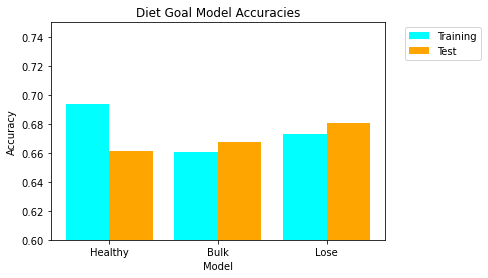

In [46]:
# create data
x = np.arange(3)
y1 = [rf_healthy.score(X_healthy_train, y_healthy_train), rf_bulk.score(X_bulk_train, y_bulk_train), rf_lose.score(X_lose_train, y_lose_train)] #accuracy on training data
y2 = [rf_healthy.score(X_healthy_test, y_healthy_test), rf_bulk.score(X_bulk_test, y_bulk_test), rf_lose.score(X_lose_test, y_lose_test)] #accuracy on test data
width = 0.4
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x+0.2, y2, width, color='orange')
plt.xticks(x, ['Healthy', 'Bulk', 'Lose'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.legend(["Training", "Test"], bbox_to_anchor=(1.3, 1), ncol= 1)
plt.ylim([0.6, 0.75])
plt.title('Diet Goal Model Accuracies')
plt.show()

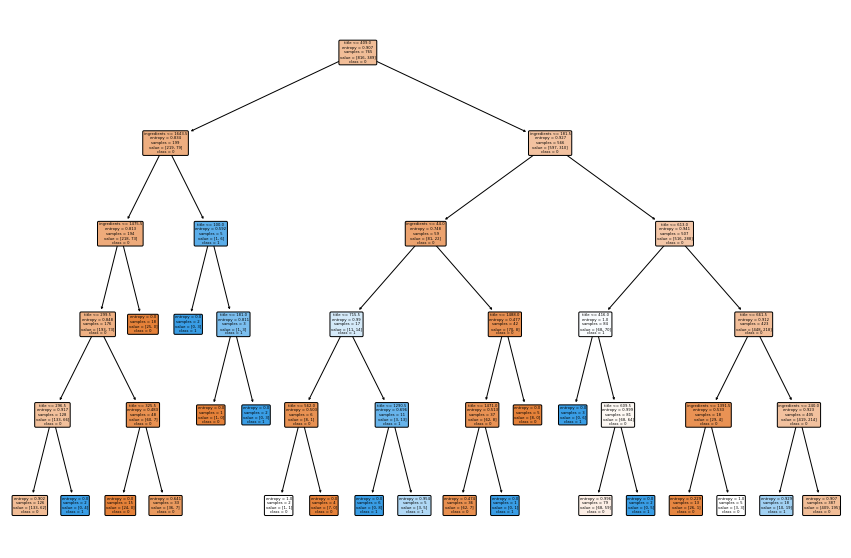

In [47]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(rf_healthy.estimators_[0], 
          feature_names=feature_columns,
          class_names=['0', '1'], 
          filled=True, impurity=True, 
          rounded=True)
fig.savefig('healthytree.png')

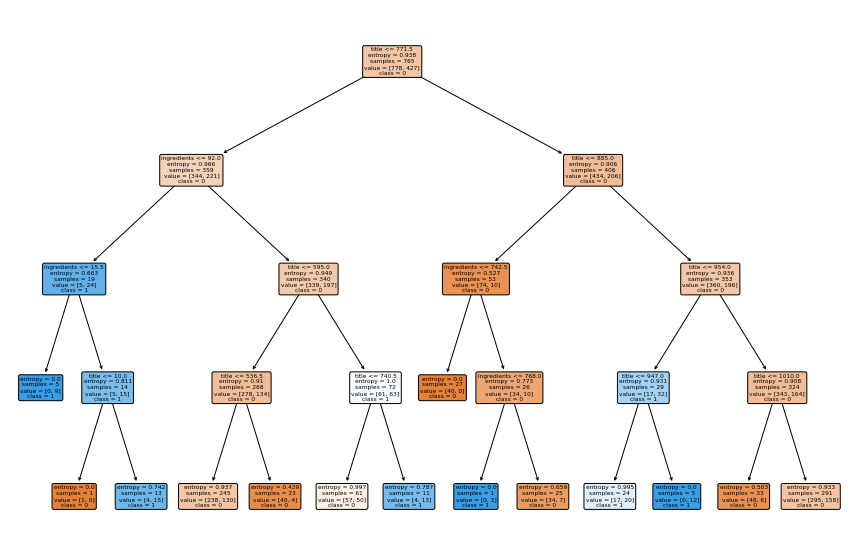

In [48]:
fig2 = plt.figure(figsize=(15, 10))
plot_tree(rf_bulk.estimators_[0], 
          feature_names=feature_columns,
          class_names=['0', '1'], 
          filled=True, impurity=True, 
          rounded=True)

fig2.savefig('bulktree.png')



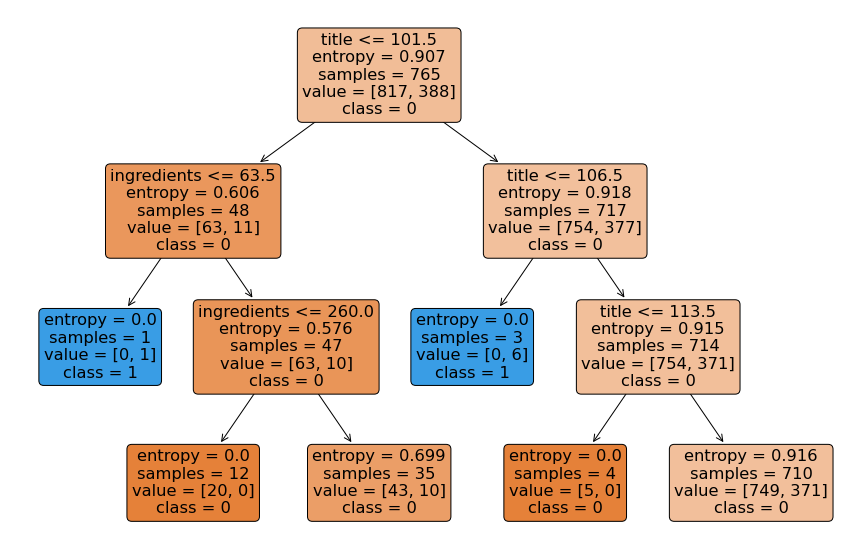

In [49]:
fig3 = plt.figure(figsize=(15, 10))
plot_tree(rf_lose.estimators_[0], 
          feature_names=feature_columns,
          class_names=['0', '1'], 
          filled=True, impurity=True, 
          rounded=True)

fig3.savefig('losetree.png')